# Implementation of Logistic Regression [Assignment 2 Part1]
We start from importing the required libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Next we read the Social_Network_Ads.csv data file using the pandas library

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")

**Implementing Logistic Regression from Scratch**

In [12]:
#Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(df['Age'], df['Purchased'], test_size=0.30)

# Normalization
def normalize(X):
    return X - X.mean()

# Standardization
def standardize(X):
    mean_X = np.mean(X)
    std_X = np.std(X)
    standardized_X = (X - mean_X) / std_X
    return standardized_X

def predict(X, b0, b1):
    return np.array([1 / (1 + np.exp(-1 * b0 + -1 * b1 * x)) for x in X])

def logistic_regression(X, Y):
    m = 0
    c = 0
    lr = 0.001
    epochs = 5000

    for epoch in range(epochs):
        y_pred = predict(X, c, m)
        dc = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        dm = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        c = c - lr * dc
        m = m - lr * dm

    return c, m

# Accuracy of the model
def accuracy_model(test_data_x, test_data_y, c, m):
    accuracy = 0
    y_pred = predict(test_data_x, c, m)
    y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

    for i in range(len(y_pred)):
        if y_pred[i] == test_data_y.iloc[i]:
            accuracy += 1
    return accuracy * 100 / len(y_pred)

# Training the model
c1, m1 = logistic_regression(X_train, Y_train)
c2, m2 = logistic_regression(normalize(X_train), Y_train)
c3, m3 = logistic_regression(standardize(X_train), Y_train)

# Accuracy Calculation
print("Accuracies of models:\n")
print("Using raw data:", round(accuracy_model(X_test, Y_test, c1, m1), 4))
print("Using normalized data:", round(accuracy_model(normalize(X_test), Y_test, c2, m2), 4))
print("Using standardized data:", round(accuracy_model(standardize(X_test), Y_test, c3, m3), 4))

Accuracies of models:

Using raw data: 60.8333
Using normalized data: 84.1667
Using standardized data: 84.1667


**Implementing Logistic Regression using scikit-learn**

In [13]:
# Splitting the dataset into train and test set
x = df[['Age', 'EstimatedSalary']].values
y = df['Purchased']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

# Normalization
norm = MinMaxScaler().fit(train_x)
train_norm_x = norm.transform(train_x)
test_norm_x = norm.transform(test_x)

# Standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)

# Logistic regression model for raw data
model_1 = LogisticRegression(max_iter=10000, random_state=0)
model_1.fit(train_x, train_y)
predictions_1 = model_1.predict(test_x)
accuracy_1 = accuracy_score(test_y, predictions_1)

# Logistic regression model for normalized data
model_2 = LogisticRegression(max_iter=10000, random_state=0)
model_2.fit(train_norm_x, train_y)
predictions_2 = model_2.predict(test_norm_x)
accuracy_2 = accuracy_score(test_y, predictions_2)

# Logistic regression model for standardized data
model_3 = LogisticRegression(max_iter=10000, random_state=0)
model_3.fit(x_train, train_y)
predictions_3 = model_3.predict(x_test)
accuracy_3 = accuracy_score(test_y, predictions_3)

# Results
print("Accuracies of models:\n")
print("Using raw data:", f'{accuracy_1*100:.4f}%')
print("Using normalized data:", f'{accuracy_2*100:.4f}%')
print("Using standardized data:", f'{accuracy_3*100:.4f}%')

Accuracies of models:

Using raw data: 65.8333%
Using normalized data: 84.1667%
Using standardized data: 86.6667%


# Implementing k-Nearest Neighbours Classifier [Assignment2 Part2]

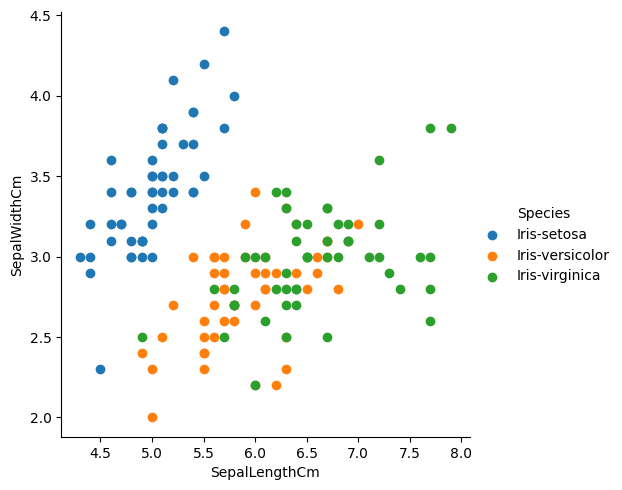

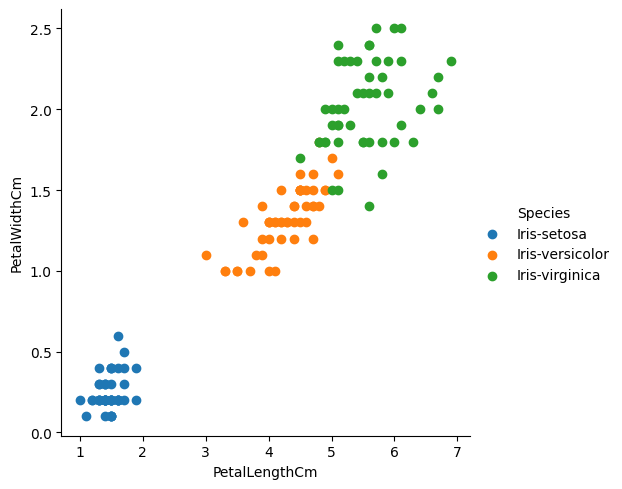

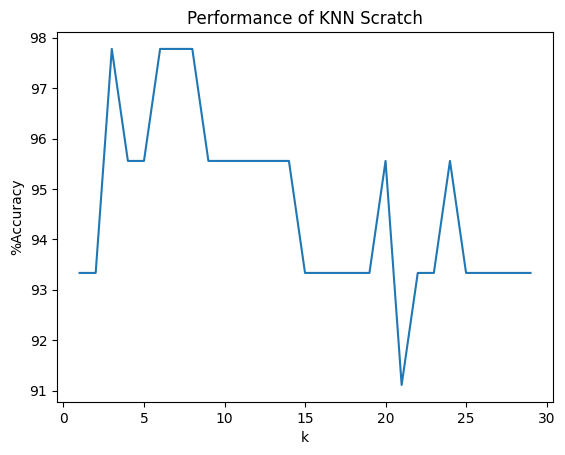

The accuracy of the KNN is 95.55555555555556 %


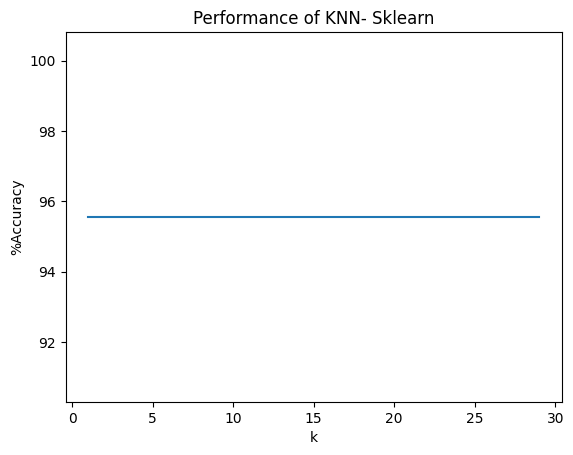

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Data Exploration and Cleaning
df = pd.read_csv("Iris.csv")
df.head()

sns.FacetGrid(df, height=5, hue="Species").map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
sns.FacetGrid(df, height=5, hue="Species").map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

mapping = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
df['Species_Number'] = df['Species'].map(mapping)

# Splitting dataset into Train and Test Data
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species_Number'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

# Part A: From Scratch
def euclidean(point, data):
    return np.sqrt(np.sum((point - data) ** 2, axis=1))

def most_common(lst):
    return max(set(lst), key=lst.count)

class KNeighborsClassifier:
    def __init__(self, **kwargs):
        self.k = kwargs.get('k', 5)
        self.dist_metric = kwargs.get('dist_metric', euclidean)

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = 100 * sum(y_pred == y_test) / len(y_test)
        return accuracy

accuracies = []
ks = range(1, 30)

for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="%Accuracy",
       title="Performance of KNN Scratch")
plt.show()

# Part B: Using Sklearn
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

predictions_ = model.predict(X_test)

print('The accuracy of the KNN is', accuracy_score(predictions_, y_test) * 100, '%')

accuracy_k = []
k_values = list(range(1, 30))

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_ = model.predict(X_test)
    acc_k = accuracy_score(y_pred_, y_test) * 100
    accuracy_k.append(acc_k)

fig, ax = plt.subplots()
ax.plot(k_values, accuracy_k)
ax.set(xlabel="k",
       ylabel="%Accuracy",
       title="Performance of KNN- Sklearn")
plt.show()
